<a href="https://colab.research.google.com/github/eterniacockers/BASH-Risk/blob/main/Fuzzy_AHP_Mann_and_Whitney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

Saving Fuzzy AHP comparison draft.xlsx to Fuzzy AHP comparison draft.xlsx


In [ ]:
#expert versus ML
import pandas as pd
from scipy.stats import mannwhitneyu

# Load your Excel file
file_path = "Fuzzy AHP comparison draft.xlsx"  # Update with your path if needed
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Define weather-related feature columns
features = [
    'Wet_Bulb', 'Altimeter', 'Precipitation', 'Humidity',
    'Sky_Cond', 'Visibility', 'Wind_Dir', 'Wind_Speed'
]

# Initialize result storage
mw_results = []

# Loop through each feature to run Mann–Whitney U test
for feature in features:
    expert_vals = df[df['Rater_Type'] == 1][feature]
    ml_vals = df[df['Rater_Type'] == 2][feature]

    try:
        stat, p = mannwhitneyu(expert_vals, ml_vals, alternative='two-sided')
        mw_results.append((feature, stat, p))
    except ValueError as e:
        mw_results.append((feature, None, str(e)))

# Convert results into a DataFrame
mw_df = pd.DataFrame(mw_results, columns=["Feature", "U_statistic", "p_value_or_error"])

# Display or export
print(mw_df)

# Optional: save to CSV
mw_df.to_csv("fuzzy mann_whitney_results.csv", index=False)


         Feature  U_statistic  p_value_or_error
0       Wet_Bulb        422.0          0.000001
1      Altimeter        167.5          0.158364
2  Precipitation         73.0          0.000182
3       Humidity        321.0          0.014701
4       Sky_Cond        411.5          0.000004
5     Visibility         49.5          0.000017
6       Wind_Dir        256.0          0.435150
7     Wind_Speed         81.5          0.000451


In [ ]:
# ✅ Download the file (if you're in Colab)
from google.colab import files
files.download("fuzzy mann_whitney_results.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#By flyway and location

# 📚 Import libraries
import pandas as pd
from scipy.stats import mannwhitneyu, kruskal
from google.colab import files


# 📂 Load the uploaded Excel file
df = pd.read_excel("Fuzzy AHP comparison draft.xlsx", sheet_name="Sheet1")

# 🧭 Define feature list
features = [
    'Wet_Bulb', 'Altimeter', 'Precipitation', 'Humidity',
    'Sky_Cond', 'Visibility', 'Wind_Dir', 'Wind_Speed'
]

# 🧭 Define Region (North vs South)
# Location == 1 → North, Location == 2 → South
df['Region'] = df['Location'].apply(lambda x: 'North' if x == 1 else 'South' if x == 2 else 'Other')

# ✅ Mann–Whitney U Test: North vs South
mw_region_results = []
for feature in features:
    north_vals = df[df['Region'] == 'North'][feature]
    south_vals = df[df['Region'] == 'South'][feature]
    try:
        stat, p = mannwhitneyu(north_vals, south_vals, alternative='two-sided')
        mw_region_results.append((feature, stat, p))
    except ValueError as e:
        mw_region_results.append((feature, None, str(e)))

mw_region_df = pd.DataFrame(mw_region_results, columns=["Feature", "U_statistic", "p_value"])
print("🔹 Mann–Whitney U Results: North vs South")
print(mw_region_df)

# ✅ Kruskal–Wallis Test: Flyway
kw_flyway_results = []
for feature in features:
    flyway_groups = [group[feature].dropna() for name, group in df.groupby("Flyway")]
    try:
        stat, p = kruskal(*flyway_groups)
        kw_flyway_results.append((feature, stat, p))
    except ValueError as e:
        kw_flyway_results.append((feature, None, str(e)))

kw_flyway_df = pd.DataFrame(kw_flyway_results, columns=["Feature", "H_statistic", "p_value"])
print("\n🔹 Kruskal–Wallis Results: Flyway")
print(kw_flyway_df)

# 📤 Save and download results as CSV files
mw_region_df.to_csv("fuzzy north_vs_south_mannwhitney.csv", index=False)
kw_flyway_df.to_csv("fuzzy flyway_kruskalwallis.csv", index=False)
files.download("fuzzy north_vs_south_mannwhitney.csv")
files.download("fuzzy flyway_kruskalwallis.csv")



🔹 Mann–Whitney U Results: North vs South
         Feature  U_statistic   p_value
0       Wet_Bulb        212.0  0.489504
1      Altimeter        332.0  0.029010
2  Precipitation        199.5  0.320238
3       Humidity        178.0  0.125044
4       Sky_Cond        262.0  0.633474
5     Visibility        223.0  0.668418
6       Wind_Dir        246.0  0.923964
7     Wind_Speed        288.5  0.268564

🔹 Kruskal–Wallis Results: Flyway
         Feature  H_statistic   p_value
0       Wet_Bulb     1.296229  0.730029
1      Altimeter     5.645392  0.130197
2  Precipitation     1.730767  0.630115
3       Humidity     5.423303  0.143299
4       Sky_Cond     1.862883  0.601347
5     Visibility     2.907069  0.406176
6       Wind_Dir     2.203521  0.531255
7     Wind_Speed     5.848685  0.119209


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#By groups and flyway/location

# 📚 Import libraries
import pandas as pd
from scipy.stats import mannwhitneyu, kruskal
from google.colab import files

# 📂 Load the Excel file
df = pd.read_excel("Fuzzy AHP comparison draft.xlsx", sheet_name="Sheet1")

# 🧭 Feature list
features = [
    'Wet_Bulb', 'Altimeter', 'Precipitation', 'Humidity',
    'Sky_Cond', 'Visibility', 'Wind_Dir', 'Wind_Speed'
]

# 🧭 Split into Expert and ML dataframes
expert_df = df[df['Rater_Type'] == 1].copy()
ml_df = df[df['Rater_Type'] == 2].copy()

# 🧪 Mann–Whitney U Test: Experts by Location
expert_location_results = []
for feature in features:
    north_vals = expert_df[expert_df['Location'] == 1][feature]
    south_vals = expert_df[expert_df['Location'] == 2][feature]
    try:
        stat, p = mannwhitneyu(north_vals, south_vals, alternative='two-sided')
        expert_location_results.append((feature, stat, p))
    except ValueError as e:
        expert_location_results.append((feature, None, str(e)))

expert_loc_df = pd.DataFrame(expert_location_results, columns=["Feature", "U_statistic", "p_value"])
print("🔹 Experts by Location (Mann–Whitney)")
print(expert_loc_df)

# 🧪 Kruskal–Wallis Test: Experts by Flyway
expert_flyway_results = []
for feature in features:
    flyway_groups = [group[feature].dropna() for name, group in expert_df.groupby("Flyway")]
    try:
        stat, p = kruskal(*flyway_groups)
        expert_flyway_results.append((feature, stat, p))
    except ValueError as e:
        expert_flyway_results.append((feature, None, str(e)))

expert_fly_df = pd.DataFrame(expert_flyway_results, columns=["Feature", "H_statistic", "p_value"])
print("\n🔹 Experts by Flyway (Kruskal–Wallis)")
print(expert_fly_df)

# 🧪 Mann–Whitney U Test: ML by Location
ml_location_results = []
for feature in features:
    north_vals = ml_df[ml_df['Location'] == 1][feature]
    south_vals = ml_df[ml_df['Location'] == 2][feature]
    try:
        stat, p = mannwhitneyu(north_vals, south_vals, alternative='two-sided')
        ml_location_results.append((feature, stat, p))
    except ValueError as e:
        ml_location_results.append((feature, None, str(e)))

ml_loc_df = pd.DataFrame(ml_location_results, columns=["Feature", "U_statistic", "p_value"])
print("\n🔹 ML by Location (Mann–Whitney)")
print(ml_loc_df)

# 🧪 Kruskal–Wallis Test: ML by Flyway
ml_flyway_results = []
for feature in features:
    flyway_groups = [group[feature].dropna() for name, group in ml_df.groupby("Flyway")]
    try:
        stat, p = kruskal(*flyway_groups)
        ml_flyway_results.append((feature, stat, p))
    except ValueError as e:
        ml_flyway_results.append((feature, None, str(e)))

ml_fly_df = pd.DataFrame(ml_flyway_results, columns=["Feature", "H_statistic", "p_value"])
print("\n🔹 ML by Flyway (Kruskal–Wallis)")
print(ml_fly_df)

# 📤 Save results as CSV
expert_loc_df.to_csv("fuzzy expert_by_location.csv", index=False)
expert_fly_df.to_csv("fuzzy expert_by_flyway.csv", index=False)
ml_loc_df.to_csv("fuzzy ml_by_location.csv", index=False)
ml_fly_df.to_csv("fuzzy ml_by_flyway.csv", index=False)

# 📥 Download files
files.download("fuzzy expert_by_location.csv")
files.download("fuzzy expert_by_flyway.csv")
files.download("fuzzy ml_by_location.csv")
files.download("fuzzy ml_by_flyway.csv")


🔹 Experts by Location (Mann–Whitney)
         Feature  U_statistic   p_value
0       Wet_Bulb         87.5  0.656464
1      Altimeter        153.0  0.009799
2  Precipitation         99.0  0.961133
3       Humidity         68.0  0.159237
4       Sky_Cond        101.5  0.868835
5     Visibility         79.0  0.396264
6       Wind_Dir         82.0  0.485550
7     Wind_Speed         89.5  0.721824

🔹 Experts by Flyway (Kruskal–Wallis)
         Feature  H_statistic   p_value
0       Wet_Bulb     2.221320  0.527761
1      Altimeter     1.397488  0.706124
2  Precipitation     0.858347  0.835466
3       Humidity     2.438682  0.486475
4       Sky_Cond     2.267151  0.518843
5     Visibility     4.319135  0.229002
6       Wind_Dir     1.050835  0.788954
7     Wind_Speed     2.649754  0.448834

🔹 ML by Location (Mann–Whitney)
         Feature  U_statistic   p_value
0       Wet_Bulb         27.0  0.590679
1      Altimeter         32.0  1.000000
2  Precipitation          6.0  0.005964
3       Humi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Spearman's Rho
import pandas as pd
from scipy.stats import spearmanr

# Load Excel file
file_path = "Fuzzy AHP comparison draft.xlsx"  # Adjust path as needed
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Define the 8 weather features
features = [
    'Wet_Bulb', 'Altimeter', 'Precipitation', 'Humidity',
    'Sky_Cond', 'Visibility', 'Wind_Dir', 'Wind_Speed'
]

# Separate AHP (Expert) and ML raters
expert_df = df[df['Rater_Type'] == 1][features]
ml_df = df[df['Rater_Type'] == 2][features]

# Compute average ML and AHP ranks
avg_expert_ranks = expert_df.mean()
avg_ml_ranks = ml_df.mean()

# Compute overall Spearman rho (aggregated ML vs. aggregated AHP)
rho, p = spearmanr(avg_expert_ranks, avg_ml_ranks)

print(f"✅ Overall Spearman's rho (Avg Expert vs Avg ML): {rho:.4f}, p = {p:.4f}")

# Optional: pairwise Spearman for each expert vs avg ML
pairwise_results = []

for i, row in expert_df.iterrows():
    expert_name = df.loc[row.name, 'Rater_Name'] if 'Rater_Name' in df.columns else f'Expert_{i+1}'
    rho_i, p_i = spearmanr(row, avg_ml_ranks)
    pairwise_results.append((expert_name, rho_i, p_i))

# Create DataFrame of pairwise results
pairwise_df = pd.DataFrame(pairwise_results, columns=["Expert", "Spearman_rho", "p_value"])

# Save or display
print(pairwise_df)
pairwise_df.to_csv("spearman_expert_vs_avg_ml.csv", index=False)


✅ Overall Spearman's rho (Avg Expert vs Avg ML): -0.1905, p = 0.6514
       Expert  Spearman_rho   p_value
0    Expert_1      0.000000  1.000000
1    Expert_2     -0.452381  0.260405
2    Expert_3     -0.119048  0.778886
3    Expert_4      0.047619  0.910849
4    Expert_5     -0.666667  0.070988
5    Expert_6      0.000000  1.000000
6    Expert_7     -0.666667  0.070988
7    Expert_8     -0.119048  0.778886
8    Expert_9     -0.571429  0.138960
9   Expert_10     -0.071429  0.866526
10  Expert_11     -0.285714  0.492726
11  Expert_12     -0.190476  0.651401
12  Expert_13     -0.190476  0.651401
13  Expert_14     -0.428571  0.289403
14  Expert_15     -0.095238  0.822505
15  Expert_16      0.047619  0.910849
16  Expert_17     -0.095238  0.822505
17  Expert_18      0.261905  0.530923
18  Expert_19      0.642857  0.085559
19  Expert_20      0.214286  0.610344
20  Expert_21     -0.047619  0.910849
21  Expert_22     -0.500000  0.207031
22  Expert_23      0.190476  0.651401
23  Expert_24     -

In [ ]:
#Raw coding of the overall results
import pandas as pd
from scipy.stats import spearmanr

# ✅ Step 1: Create data from the screenshots
# AHP importance scores
ahp_data = {
    "Feature": ["Precipitation", "Wind_Speed", "Visibility", "Sky_Cond", "Wind_Dir", "Wet_Bulb", "Altimeter", "Humidity"],
    "Fuzzy_AHP_Importance": [.209, .172, .158, .121, .110, .092, .076, .061]
}

# ML normalized priority scores
ml_data = {
    "Feature": ["Wet_Bulb", "Sky_Cond", "Wind_Speed", "Humidity", "Wind_Direction", "Precipitation", "Visibility", "Altimeter"],
    "ML_Priority": [.254993, .245549, .101997, .09082, .08498, .080852, .074492, .066298]
}

# ✅ Step 2: Merge into one DataFrame based on Feature name
ahp_df = pd.DataFrame(ahp_data)
ml_df = pd.DataFrame(ml_data)

merged_df = pd.merge(ahp_df, ml_df, on="Feature")

# ✅ Step 3: Compute Spearman's rho
rho, p_value = spearmanr(merged_df["Fuzzy_AHP_Importance"], merged_df["ML_Priority"])

# ✅ Step 4: Print results
print("✅ Overall Spearman's rho (AHP vs ML):", round(rho, 4), " | p-value:", round(p_value, 4))


✅ Overall Spearman's rho (AHP vs ML): 0.0  | p-value: 1.0


In [ ]:
#Raw coding of the overall results for Pearson
import pandas as pd
from scipy.stats import pearsonr

# ✅ Step 1: Create data from the screenshots
# AHP importance scores
ahp_data = {
    "Feature": ["Precipitation", "Wind_Speed", "Visibility", "Sky_Cond", "Wind_Dir", "Wet_Bulb", "Altimeter", "Humidity"],
    "Fuzzy_AHP_Importance": [0.209,.172,.158,.121,.110,.092,.076,.061]
}

# ML normalized priority scores
ml_data = {
    "Feature": ["Wet_Bulb", "Sky_Cond", "Wind_Speed", "Humidity", "Wind_Direction", "Precipitation", "Visibility", "Altimeter"],
    "ML_Priority": [.254993, .245549, .101997, .09082, .08498, .080852, .074492, .066298]
}

# ✅ Step 2: Merge into one DataFrame based on Feature name
ahp_df = pd.DataFrame(ahp_data)
ml_df = pd.DataFrame(ml_data)

merged_df = pd.merge(ahp_df, ml_df, on="Feature")

# Pearson correlation between continuous AHP importance and ML priority scores
r, p_val = pearsonr(merged_df["Fuzzy_AHP_Importance"], merged_df["ML_Priority"])

#Step 4 Print results
print("✅ Pearson correlation (Fuzzy AHP Importance vs ML Priority):", round(r, 4), "| p-value:", round(p_val, 4))

✅ Pearson correlation (Fuzzy AHP Importance vs ML Priority): -0.2308 | p-value: 0.6186


In [ ]:
from scipy.stats import kendalltau

tau, p_kendall = kendalltau(merged_df["Fuzzy_AHP_Importance"], merged_df["ML_Priority"])
print(f"Kendall's tau: {round(tau, 4)}, p-value: {round(p_kendall, 4)}")


Kendall's tau: -0.0476, p-value: 1.0


<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

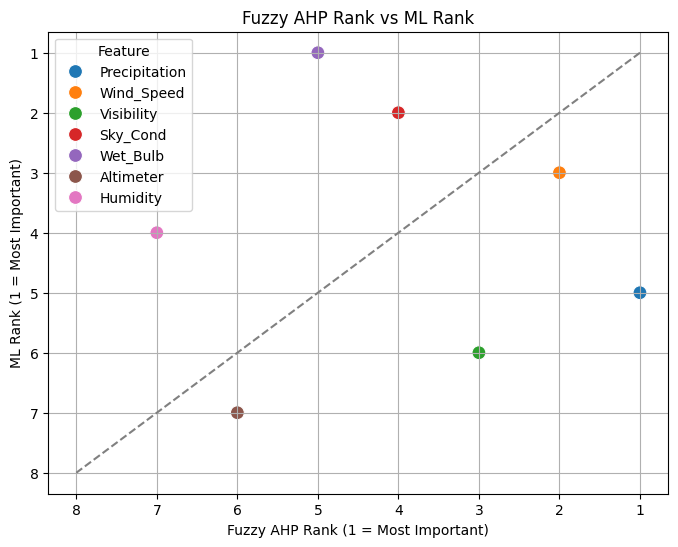

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use your existing merged_df
# Convert importance scores to ranks (1 = highest)
merged_df["AHP_Rank"] = merged_df["Fuzzy_AHP_Importance"].rank(ascending=False)
merged_df["ML_Rank"] = merged_df["ML_Priority"].rank(ascending=False)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_df, x="AHP_Rank", y="ML_Rank", hue="Feature", s=100)

# Add diagonal line for perfect agreement
plt.plot([1, 8], [1, 8], linestyle='--', color='gray')

plt.title("Fuzzy AHP Rank vs ML Rank")
plt.xlabel("Fuzzy AHP Rank (1 = Most Important)")
plt.ylabel("ML Rank (1 = Most Important)")
plt.gca().invert_xaxis()  # Optional: Highest rank on left
plt.gca().invert_yaxis()  # Optional: Highest rank on top
plt.grid(True)
plt.legend


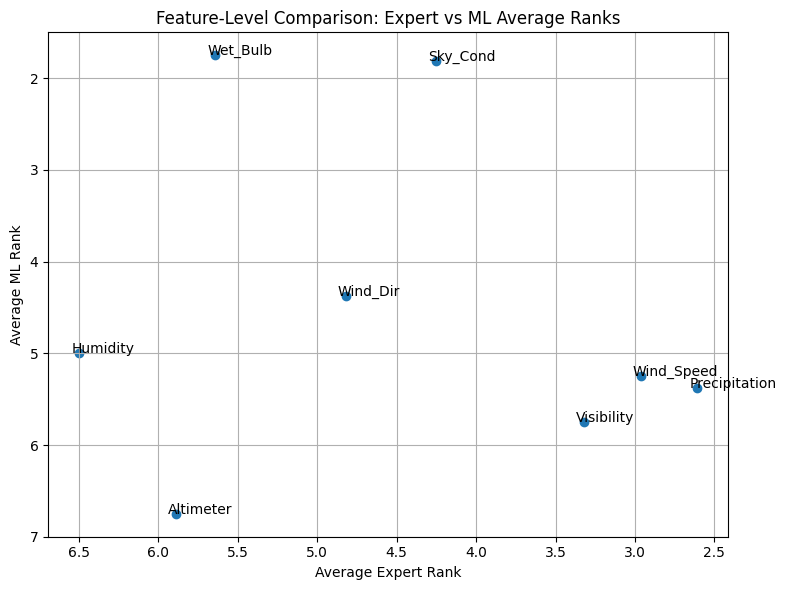

In [ ]:
#Monotonic graphs
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = "/content/Fuzzy AHP comparison draft.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Split
expert_df = df[df["Rater_Type"] == 1]
ml_df = df[df["Rater_Type"] == 2]

# Features
features = ['Wet_Bulb', 'Altimeter', 'Precipitation', 'Humidity',
            'Sky_Cond', 'Visibility', 'Wind_Dir', 'Wind_Speed']

# Average ranks per feature
expert_avg = expert_df[features].mean()
ml_avg = ml_df[features].mean()

# Plot each feature's expert vs ML average rank
plt.figure(figsize=(8, 6))
plt.scatter(expert_avg, ml_avg)

# Annotate each feature
for feature in features:
    plt.text(expert_avg[feature]+0.05, ml_avg[feature], feature)

plt.xlabel("Average Expert Rank")
plt.ylabel("Average ML Rank")
plt.title("Feature-Level Comparison: Expert vs ML Average Ranks")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

